#Question 1

In [2]:
#EDA
import pandas as pd
data = pd.read_csv("cancer.csv")
data

,Age,Year,Auxillary nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [3]:
#summary statistics of the available data
data.describe()

,Age,Year,Auxillary nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


<IPython.core.display.Javascript object>


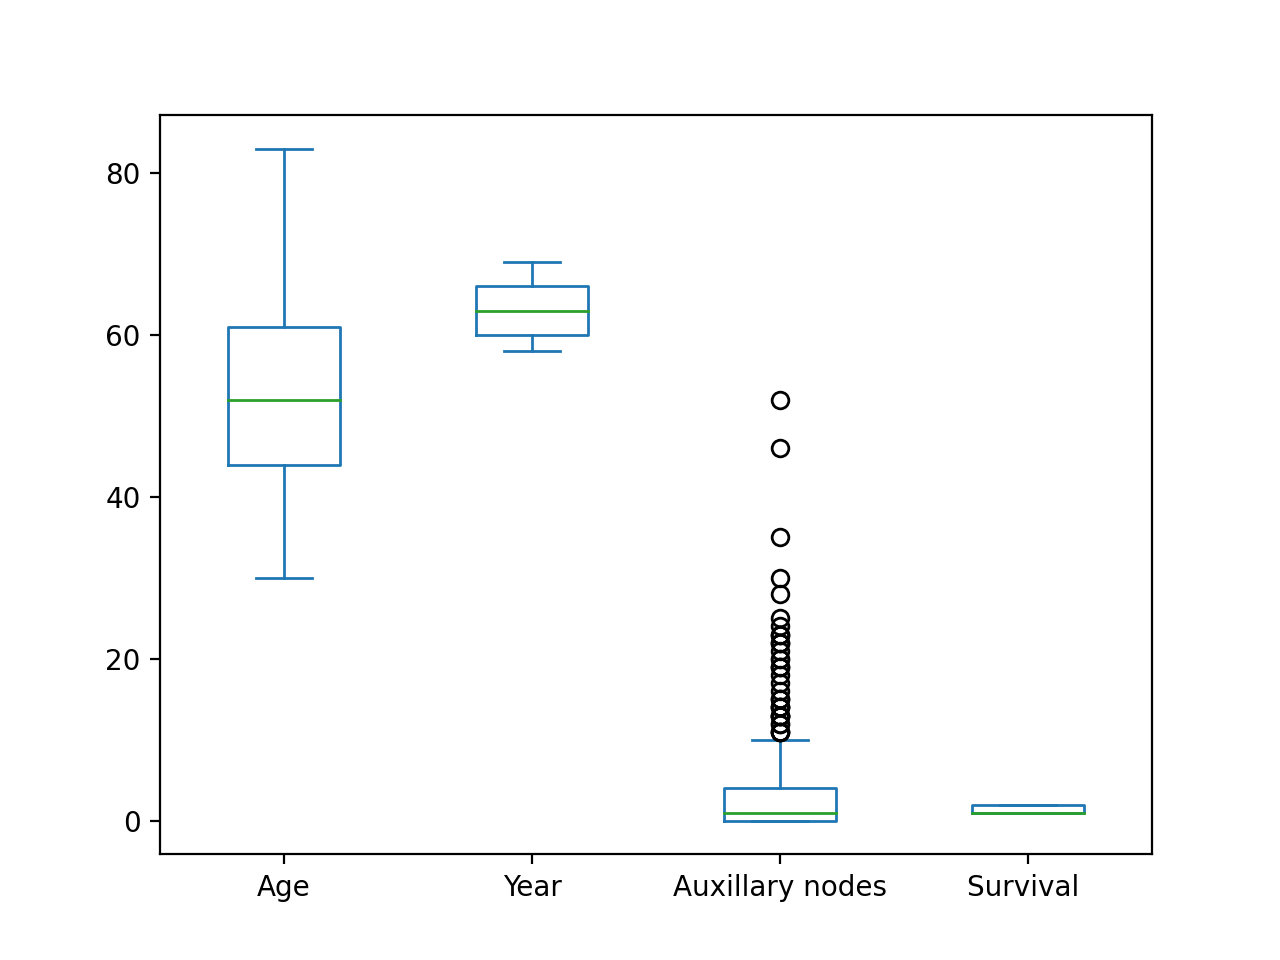

<AxesSubplot:>

In [5]:
%matplotlib notebook
data.plot.box()

<AxesSubplot:>

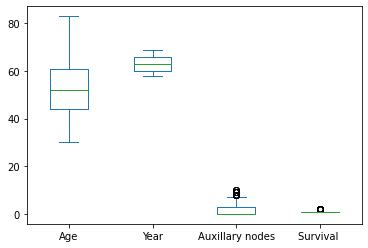

In [13]:
# Outliers in Auxillary nodes, removing them from data

maximum = 4 + 1.5*(4-0)
new_data = data[data["Auxillary nodes"] <= maximum]
new_data.plot.box()

In [7]:
corr=new_data.corr()
corr

,Age,Year,Auxillary nodes,Survival
Age,1.000000,0.092426,-0.108307,0.059688
Year,0.092426,1.000000,-0.006921,0.031328
Auxillary nodes,-0.108307,-0.006921,1.000000,0.236411
Survival,0.059688,0.031328,0.236411,1.000000


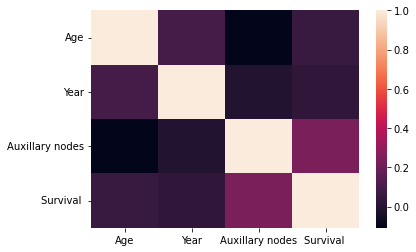

In [12]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr)
plt.show()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival '}>]], dtype=object)

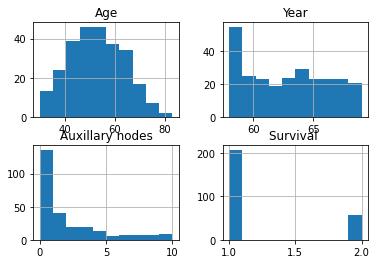

In [14]:
# No variables present which are highly correlated in the heatmap, so we are not removing any variables and cannot rely on this

# Now we will understand the skewness

new_data.hist()

C:\Users\RAJAGO~1\AppData\Local\Temp/ipykernel_7256/2695375466.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["Year"] = new_data["Year"]**(0.5)


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival '}>]], dtype=object)

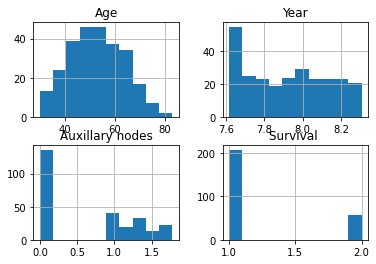

In [33]:
#Removing skewness

new_data["Year"] = new_data["Year"]**(0.5)
new_data.hist()

In [17]:
#Standardisation
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
scaler.fit(new_data)
scaled = scaler.fit_transform(new_data)
scaled_data = pd.DataFrame(scaled, columns = new_data.columns)

scaled_data

,Age,Year,Auxillary nodes,Survival
0,-2.078151,-0.258085,0.507659,-0.529333
1,-2.078151,0.661993,-0.672425,-0.529333
2,-1.986534,-1.178162,0.114297,-0.529333
3,-1.986534,0.661993,0.901020,-0.529333
4,-1.803300,-1.484854,3.261188,-0.529333
...,...,...,...,...
260,2.044615,-0.258085,-0.279064,-0.529333
261,2.136233,1.275378,-0.672425,-0.529333
262,2.227850,0.661993,0.507659,-0.529333
263,2.319467,0.661993,-0.279064,1.889171


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival '}>]], dtype=object)

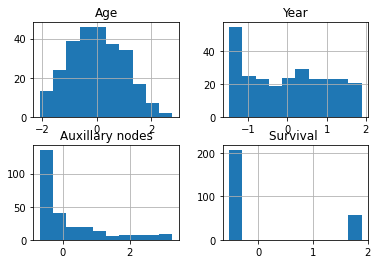

In [36]:
scaled_data.hist()

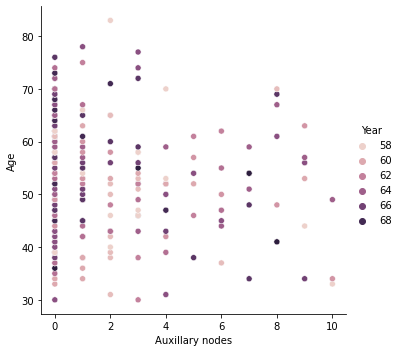

In [25]:
# Tried to see how the data is distributed/related
#sns.relplot(x='Auxillary nodes', y='Age', hue = 'Year', data = new_data)

In [19]:
# Normalisation
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(new_data)
scaled = scaler.fit_transform(new_data)
scaled_data = pd.DataFrame(scaled, columns = new_data.columns)

scaled_data

,Age,Year,Auxillary nodes,Survival
0,-2.078151,-0.258085,0.507659,-0.529333
1,-2.078151,0.661993,-0.672425,-0.529333
2,-1.986534,-1.178162,0.114297,-0.529333
3,-1.986534,0.661993,0.901020,-0.529333
4,-1.803300,-1.484854,3.261188,-0.529333
...,...,...,...,...
260,2.044615,-0.258085,-0.279064,-0.529333
261,2.136233,1.275378,-0.672425,-0.529333
262,2.227850,0.661993,0.507659,-0.529333
263,2.319467,0.661993,-0.279064,1.889171


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival '}>]], dtype=object)

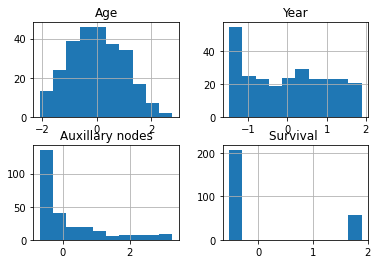

In [35]:
scaled_data.hist()

# What can you conclude from methods of central tendency and deviation of the variables?
    ##### We can see that there are outliers in variable - Auxillary nodes and hence removing them might help in understanding better.
    ##### There is a big difference between the highest and the lowest value. 

# Are there any correlated variables?
    #### No variables present which are highly correlated in the heatmap, so we cannot rely on this

# Interpret the skewness of the variables.
    #### We see that there is positive skewness on all the data, removing outliers also we see the same visulaization. No changes.


#QUESTION 2

In [121]:
#SLM

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import linear_model
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve



from sklearn.neural_network import MLPClassifier

%matplotlib inline

In [105]:
data_cancer = pd.read_csv("cancer.csv")

data_cancer.head(10)

,Age,Year,Auxillary nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
5,33,60,0,1
6,34,59,0,2
7,34,66,9,2
8,34,58,30,1
9,34,60,1,1


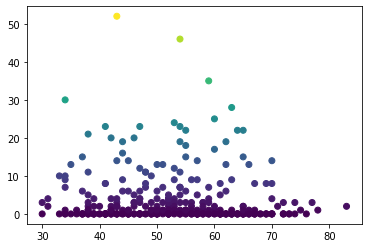

In [106]:
plt.scatter(data_cancer['Age'], data_cancer['Auxillary nodes'], c = data_cancer['Auxillary nodes'])

<AxesSubplot:xlabel='Auxillary nodes', ylabel='count'>

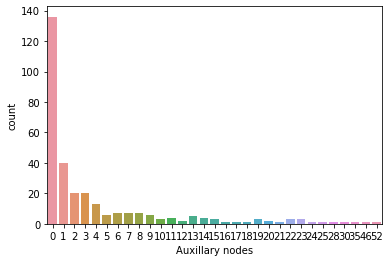

In [107]:
sns.countplot(x='Auxillary nodes', data = data_cancer )

<AxesSubplot:ylabel='Frequency'>

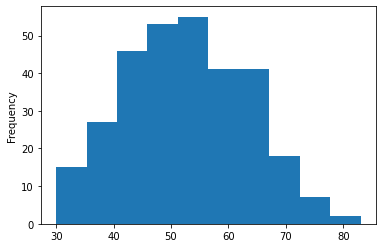

In [108]:
data_cancer["Age"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

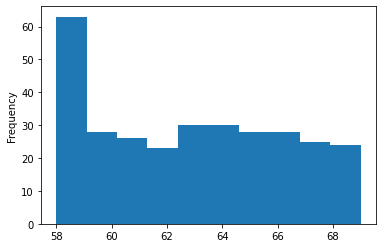

In [109]:
data_cancer["Year"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

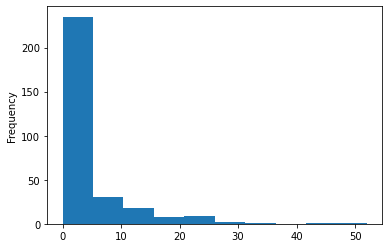

In [110]:
data_cancer["Auxillary nodes"].plot.hist()

In [111]:
data_cancer.isnull()

,Age,Year,Auxillary nodes,Survival
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
300,False,False,False,False
301,False,False,False,False
302,False,False,False,False
303,False,False,False,False


In [112]:
data_cancer.isnull().sum()

Age                0
Year               0
Auxillary nodes    0
Survival           0
dtype: int64

<AxesSubplot:>

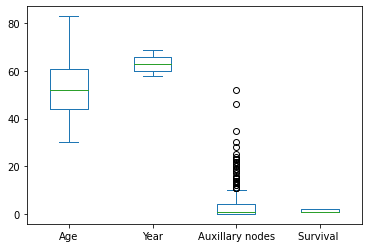

In [9]:
data_cancer.plot.box()

In [10]:
X=data_cancer.iloc[:,[0,2]].values
y=data_cancer.iloc[:,3].values

In [11]:
y

array([1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,

In [12]:
from sklearn.cross_validation import train_test_split

ModuleNotFoundError: No module named 'sklearn.cross_validation'

<AxesSubplot:>

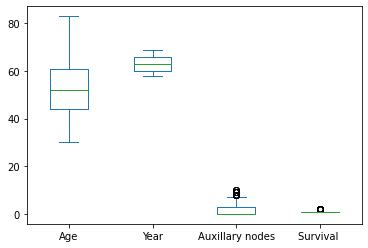

In [66]:
maximum = 4 + 1.5*(4-0)
new_data = data_cancer[data_cancer["Auxillary nodes"] <= maximum]
new_data.plot.box()

In [67]:
X=new_data.iloc[:,[0,2]].values
y=new_data.iloc[:,3].values

In [68]:
y

array([1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       2], dtype=int64)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.4, random_state=0)

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [74]:
y_pred=classifier.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
accuracy_score(y_test, y_pred)*100

76.41509433962264

In [77]:
from sklearn.metrics import classification_report

In [78]:
classification_report(y_test, y_pred)

C:\Users\Rajagopal Nair\Documents\Python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rajagopal Nair\Documents\Python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rajagopal Nair\Documents\Python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           1       0.76      1.00      0.87        81\n           2       0.00      0.00      0.00        25\n\n    accuracy                           0.76       106\n   macro avg       0.38      0.50      0.43       106\nweighted avg       0.58      0.76      0.66       106\n'

In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [80]:
confusion_matrix(y_test, y_pred)

array([[81,  0],
       [25,  0]], dtype=int64)

              precision    recall  f1-score   support

           1       0.76      1.00      0.87        81
           2       0.00      0.00      0.00        25

    accuracy                           0.76       106
   macro avg       0.38      0.50      0.43       106
weighted avg       0.58      0.76      0.66       106



C:\Users\Rajagopal Nair\Documents\Python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rajagopal Nair\Documents\Python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rajagopal Nair\Documents\Python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


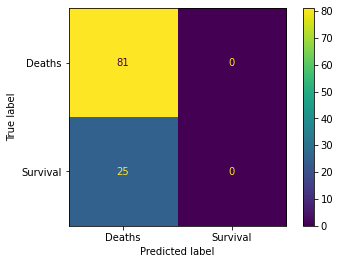

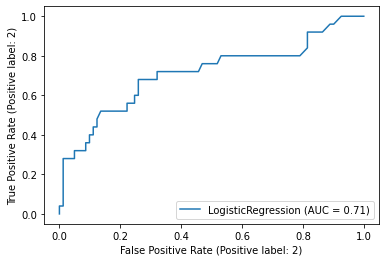

In [81]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
clf = LogisticRegression(solver = "lbfgs", penalty = 'none', random_state = 10).fit(X_train, y_train)
clf.score(X_test, y_test)
labels = ["Deaths","Survival"]
y_pred=classifier.predict(X_test)
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
print(classification_report(y_test, y_pred, labels = clf.classes_))
disp.plot()
plot_roc_curve(clf, X_test, y_test)
plt.show()

In [82]:
#CrossValidation

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

new_data = pd.read_csv("cancer.csv")

X=new_data.iloc[:,[0,2]].values
y=new_data.iloc[:,3].values

clf = LogisticRegression(solver = "lbfgs", penalty = 'none', random_state = 10).fit(X_train, y_train)
clf.score(X_test, y_test)
labels = ["Deaths","Survival"]
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
#print(classification_report(y_test, y_pred, labels = clf.classes_))

cv = KFold(n_splits=10, random_state=1, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.4, random_state=0)



scores = cross_val_score(clf, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
mean(absolute(scores))

0.259247311827957

In [85]:
from sklearn.model_selection import KFold, GridSearchCV
parameters = {'penalty':('l1','l2'), 'random_state':[1, 10]}
clf_grid = GridSearchCV(clf, parameters)
clf_grid.fit(X_train, y_train)
clf_grid.best_params_

C:\Users\Rajagopal Nair\Documents\Python\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rajagopal Nair\Documents\Python\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rajagopal Nair\Documents\Python\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Rajagopal Nair\Documents\Python\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Us

{'penalty': 'l2', 'random_state': 1}

#RandomForest


In [86]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=20)

In [87]:
model.score(X_test, y_test)

0.6721311475409836

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import linear_model
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier

%matplotlib inline
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
new_data = pd.read_csv("cancer.csv")
X=new_data.iloc[:,[0,2]].values
y=new_data.iloc[:,3].values

              precision    recall  f1-score   support

           1       0.72      0.87      0.79        82
           2       0.54      0.33      0.41        40

    accuracy                           0.69       122
   macro avg       0.63      0.60      0.60       122
weighted avg       0.66      0.69      0.66       122



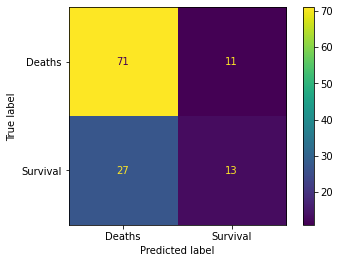

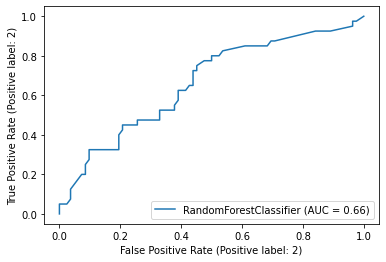

In [89]:
rf=RandomForestClassifier(n_estimators=10, max_depth = 5, max_features ='log2', random_state = 0).fit(X_train, y_train)

labels = ["Deaths","Survival"]
rf_pred = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, rf_pred, labels = rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = labels)
print(classification_report(y_test, rf_pred, labels = rf.classes_))
disp.plot()
plot_roc_curve(rf, X_test, y_test)
plt.show()

In [90]:
#Cross-validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

new_data = pd.read_csv("cancer.csv")

X=new_data.iloc[:,[0,2]].values
y=new_data.iloc[:,3].values

rf=RandomForestClassifier(n_estimators=10, max_depth = 5, max_features ='log2', random_state = 0).fit(X_train, y_train)
labels = ["Deaths","Survival"]
rf_pred = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, rf_pred, labels = rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = labels)
#print(classification_report(y_test, rf_pred, labels = rf.classes_))

cv = KFold(n_splits=10, random_state=1, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.4, random_state=0)



scores = cross_val_score(rf, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
mean(absolute(scores))



0.26903225806451614

In [91]:
from sklearn.model_selection import KFold, GridSearchCV
parameters = {'max_features':('sqrt', 'log2'), 'n_estimators':[1,10]}
rf_grid = GridSearchCV(rf, parameters)
rf_grid.fit(X_train, y_train)
rf_grid.best_params_

{'max_features': 'sqrt', 'n_estimators': 1}

# Support Vector Machine

              precision    recall  f1-score   support

           1       0.68      0.99      0.81        82
           2       0.67      0.05      0.09        40

    accuracy                           0.68       122
   macro avg       0.67      0.52      0.45       122
weighted avg       0.68      0.68      0.57       122



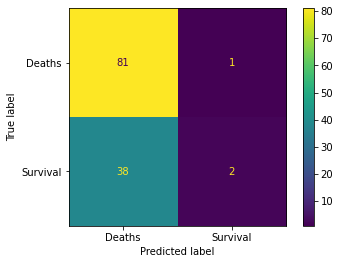

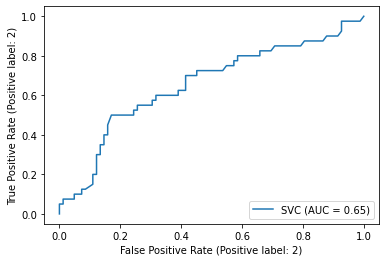

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import linear_model
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


from sklearn.neural_network import MLPClassifier

#%matplotlib inline
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
new_data = pd.read_csv("cancer.csv")
X=new_data.iloc[:,[0,2]].values
y=new_data.iloc[:,3].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.4, random_state=0)
svm = SVC(random_state = 10, kernel = "rbf", gamma = 1).fit(X_train, y_train)
svm_pred = svm.predict(X_test)

labels = ["Deaths","Survival"]
cm_svm = confusion_matrix(y_test, svm_pred, labels = svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = labels)
print(classification_report(y_test, svm_pred, labels = svm.classes_))
disp.plot()
plot_roc_curve(svm, X_test, y_test)
plt.show()

In [4]:
#Cross-validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

data_cancer = pd.read_csv("cancer.csv")

X=data_cancer.iloc[:,[0,2]].values
y=data_cancer.iloc[:,3].values

svm = SVC(random_state = 10, kernel = "rbf", gamma = 1).fit(X_train, y_train)
svm_pred = svm.predict(X_test)

labels = ["Deaths","Survival"]
cm_svm = confusion_matrix(y_test, svm_pred, labels = svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = labels)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.4, random_state=0)



scores = cross_val_score(svm, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
mean(absolute(scores))



0.27548387096774196

In [93]:
from sklearn.model_selection import KFold, GridSearchCV
parameters = {'kernel':('linear','rbf'), 'C':[1,10]}
svm_grid = GridSearchCV(svm, parameters)
svm_grid.fit(X_train, y_train)
svm_grid.best_params_

{'C': 1, 'kernel': 'linear'}

#Neural Network

              precision    recall  f1-score   support

           1       0.69      0.94      0.79        82
           2       0.50      0.12      0.20        40

    accuracy                           0.67       122
   macro avg       0.59      0.53      0.50       122
weighted avg       0.63      0.67      0.60       122



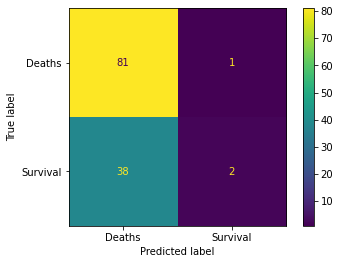

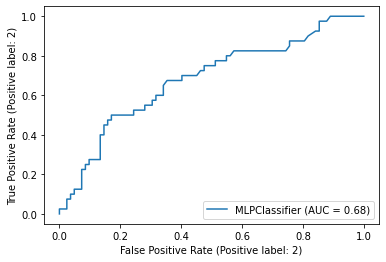

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import linear_model
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

#%matplotlib inline
#from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
new_data = pd.read_csv("cancer.csv")
X=new_data.iloc[:,[0,2]].values
y=new_data.iloc[:,3].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.4, random_state=0)

labels = ["Deaths","Survival"]

NeuroN = MLPClassifier(solver = 'lbfgs', alpha = 0.0001, hidden_layer_sizes =(10,), random_state = 1, activation = "identity",learning_rate_init = 0.01).fit(X_train, y_train)
NeuroN_pred = NeuroN.predict(X_test)
cm_NeuroN = confusion_matrix(y_test, svm_pred, labels = NeuroN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_NeuroN, display_labels = labels)
print(classification_report(y_test, NeuroN_pred, labels = NeuroN.classes_))
disp.plot()
plot_roc_curve(NeuroN, X_test, y_test)
plt.show()

In [96]:
from sklearn.model_selection import KFold, GridSearchCV


#Cross Validation

In [97]:
#Cross-validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.svm import SVC
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd
import numpy as np

new_data = pd.read_csv("cancer.csv")

X=new_data.iloc[:,[0,2]].values
y=new_data.iloc[:,3].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.4, random_state=0)
labels = ["Deaths","Survival"]

NeuroN = MLPClassifier(solver = 'lbfgs', alpha = 0.0001, hidden_layer_sizes =(10,), random_state = 1, activation = "identity",learning_rate_init = 0.01).fit(X_train, y_train)
NeuroN_pred = NeuroN.predict(X_test)
cm_NeuroN = confusion_matrix(y_test,NeuroN_pred, labels = NeuroN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_NeuroN, display_labels = labels)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.4, random_state=0)

scores = cross_val_score(NeuroN, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

mean(absolute(scores))




0.259247311827957

In [99]:
#
from sklearn.model_selection import KFold, GridSearchCV
parameters = {'activation':('identity','relu'), 'solver':('lbfgs','sgd')}
Neuron_grid = GridSearchCV(NeuroN, parameters)
Neuron_grid.fit(X_train, y_train)
Neuron_grid.best_params_

C:\Users\Rajagopal Nair\Documents\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Rajagopal Nair\Documents\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Rajagopal Nair\Documents\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'relu', 'solver': 'sgd'}

#Among the four models, based on the performance metrics Logistic Regression was the best one with 76% accuracy. Eventhough it is not a perfect value. So based on this we can say that the test data set is not relevant to analyse the correct results. The samples are bad. We need more data which is relevant to make the predictions.

# All the algorithms resulted in underfitting. Based on the evaluation on the training dataset using kfold we see that test dataset is significantly better than the performance on the training dataset.
#Underfitting: Poor performance on the training data. The data contains irrelevant information.




In [ ]:
# Function 

              Age        Year  Auxillary nodes   Survival 
count  305.000000  305.000000       305.000000  305.000000
mean    52.531148   62.849180         4.036066    1.265574
std     10.744024    3.254078         7.199370    0.442364
min     30.000000   58.000000         0.000000    1.000000
25%     44.000000   60.000000         0.000000    1.000000
50%     52.000000   63.000000         1.000000    1.000000
75%     61.000000   66.000000         4.000000    2.000000
max     83.000000   69.000000        52.000000    2.000000
     Age  Year  Auxillary nodes  Survival 
0     30    62                3          1
1     30    65                0          1
2     31    59                2          1
3     31    65                4          1
4     33    58               10          1
..   ...   ...              ...        ...
300   75    62                1          1
301   76    67                0          1
302   77    65                3          1
303   78    65                1        

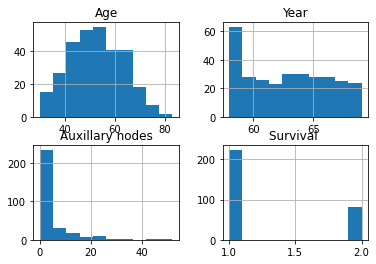

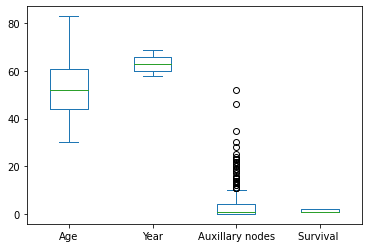

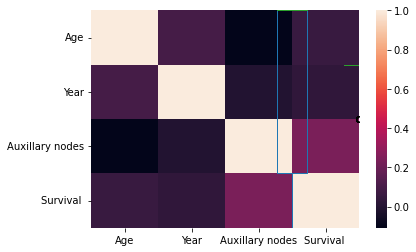

C:\Users\Rajagopal Nair\Documents\Python\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass groups=KFold(n_splits=10, random_state=1, shuffle=True) as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


TypeError: Singleton array array(KFold(n_splits=10, random_state=1, shuffle=True), dtype=object) cannot be considered a valid collection.

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import linear_model
from collections import Counter
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from numpy import mean
from numpy import absolute
from numpy import sqrt

data_cancer = pd.read_csv("cancer.csv")
report = data_cancer.describe()
print(report)
data_cancer.hist()
data_cancer.plot.box()

maximum = 4 + 1.5*(4-0)
new_data = data_cancer[data_cancer["Auxillary nodes"] <= maximum]
new_data.plot.box()
print(new_data)

corr=new_data.corr()
print(corr)
sns.heatmap(corr)
plt.show()

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

X=data_cancer.iloc[:,[0,2]].values
y=data_cancer.iloc[:,3].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.4, random_state=0)

labels = ["Deaths","Survival"]

algorithms = []
algorithms.append(('LR', LogisticRegression()))
algorithms.append(('SVM', SVC()))
algorithms.append(('NN', MLPClassifier()))
algorithms.append(('RF', RandomForestClassifier()))

results=[]
names = []
    
for name, algorithm in algorithms:
        cv = KFold(n_splits=10, random_state=1, shuffle=True)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.4, random_state=0)

        cv_results = cross_val_score(algorithm, X_train, y_train, cv)
        results.append(cv_results)
        names.append(name)
        msg= "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    

In [ ]:
# Sorry sir, not sure how to call a function. thank you.